# IMPORTING NECESSARY PACKAGES

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
from sklearn.model_selection import train_test_split
from pathlib import Path
from gradient_boosting import SyntheticData
from sklearn.tree import DecisionTreeRegressor

# IMPORTING DATA

In [28]:
train = SyntheticData(n_samples=100, noise=20)
test = SyntheticData(n_samples=100, noise=20)
df_train= train.dataframe()
df_test= test.dataframe()

# PLOTTING

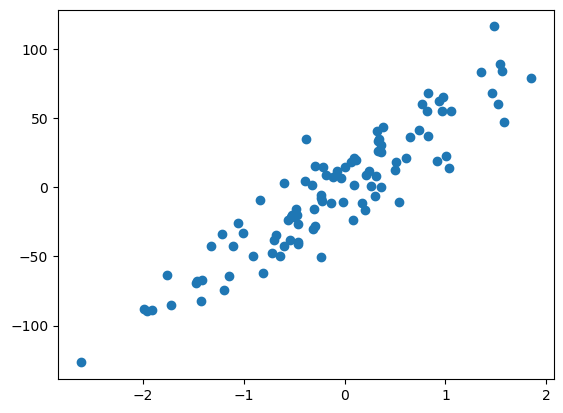

In [29]:
plt.scatter(df_train["Column_0"], df_train["Target_0"])
plt.show()

# GRADIENT BOOSTING

## MODEL 1

In [30]:
# model 1 is always mean
df_train["Predict_1"] = df_train["Target_0"].mean()
df_train

,Column_0,Target_0,Predict_1
0,0.931280,62.687202,-2.564392
1,0.087047,-23.763981,-2.564392
2,-1.057711,-25.686766,-2.564392
3,0.314247,7.936457,-2.564392
4,-0.479174,-15.475495,-2.564392
...,...,...,...
95,1.852278,78.854028,-2.564392
96,-1.424748,-82.466409,-2.564392
97,-0.719844,-47.757337,-2.564392
98,-0.072010,11.684240,-2.564392


In [31]:
# Calculating the residual of model 1
df_train["Residual_1"] = df_train["Target_0"] - df_train["Predict_1"]
df_train

,Column_0,Target_0,Predict_1,Residual_1
0,0.931280,62.687202,-2.564392,65.251594
1,0.087047,-23.763981,-2.564392,-21.199589
2,-1.057711,-25.686766,-2.564392,-23.122374
3,0.314247,7.936457,-2.564392,10.500849
4,-0.479174,-15.475495,-2.564392,-12.911102
...,...,...,...,...
95,1.852278,78.854028,-2.564392,81.418421
96,-1.424748,-82.466409,-2.564392,-79.902016
97,-0.719844,-47.757337,-2.564392,-45.192945
98,-0.072010,11.684240,-2.564392,14.248632


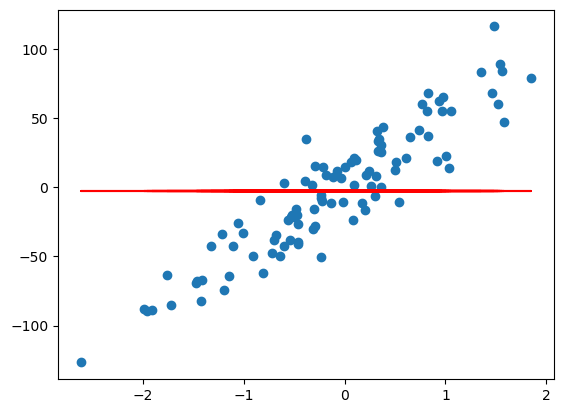

In [32]:
# Plotting the best fit line using
plt.scatter(df_train["Column_0"], df_train["Target_0"])
plt.plot(df_train["Column_0"], df_train["Predict_1"], color = "red")
plt.show()

## MODEL 2

In [33]:
from sklearn.tree import DecisionTreeRegressor

# While creating the decision tree model, make sure to have max leaf nodes between 8-32 (This is proven from research)
tree_1 = DecisionTreeRegressor(max_leaf_nodes=8)
tree_1.fit(df_train["Column_0"].to_numpy().reshape(100,1), df_train["Residual_1"])

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,8
,min_impurity_decrease,0.0
,ccp_alpha,0.0


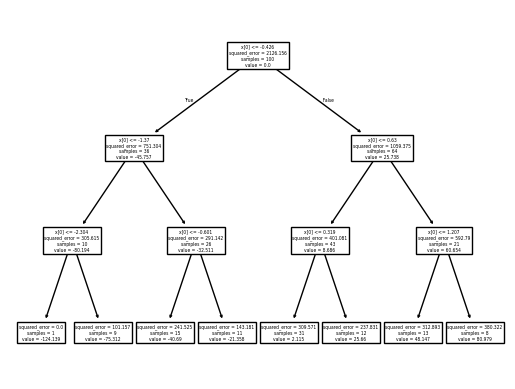

In [34]:
from sklearn.tree import plot_tree

# Plotting tree
plot_tree(tree_1)
plt.show()

In [35]:
# Testing with new data
df_test["Predict_2"] = df_train["Target_0"].mean() + tree_1.predict(df_test["Column_0"].to_numpy().reshape(100,1))
df_train["Predict_2"] = df_train["Target_0"].mean() + tree_1.predict(df_test["Column_0"].to_numpy().reshape(100,1))

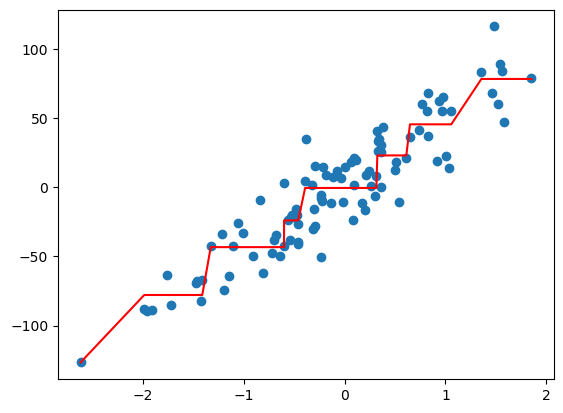

In [36]:
plt.scatter(df_train["Column_0"], df_train["Target_0"])
plt.plot(
    df_test.sort_values("Column_0")["Column_0"],
    df_test.sort_values("Column_0")["Predict_2"],
    color="red"
)
plt.show()


In [37]:
# Calculating the residual of model 1
df_train["Residual_2"] = df_train["Target_0"] - df_train["Predict_2"]
df_train

,Column_0,Target_0,Predict_1,Residual_1,Predict_2,Residual_2
0,0.931280,62.687202,-2.564392,65.251594,45.582251,17.104951
1,0.087047,-23.763981,-2.564392,-21.199589,-0.448965,-23.315015
2,-1.057711,-25.686766,-2.564392,-23.122374,-43.254712,17.567946
3,0.314247,7.936457,-2.564392,10.500849,-0.448965,8.385422
4,-0.479174,-15.475495,-2.564392,-12.911102,-23.922336,8.446841
...,...,...,...,...,...,...
95,1.852278,78.854028,-2.564392,81.418421,78.414391,0.439637
96,-1.424748,-82.466409,-2.564392,-79.902016,-77.876082,-4.590327
97,-0.719844,-47.757337,-2.564392,-45.192945,-43.254712,-4.502625
98,-0.072010,11.684240,-2.564392,14.248632,-0.448965,12.133205


## MODEL 3

In [38]:
# While creating the decision tree model, make sure to have max leaf nodes between 8-32 (This is proven from research)
tree_2 = DecisionTreeRegressor(max_leaf_nodes=8)
tree_2.fit(df_train["Column_0"].to_numpy().reshape(100,1), df_train["Residual_2"])

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,8
,min_impurity_decrease,0.0
,ccp_alpha,0.0


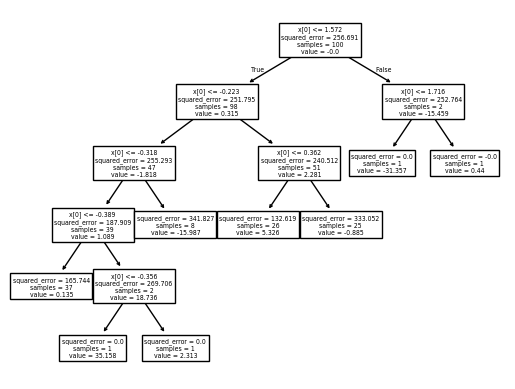

In [39]:
# Plotting tree
plot_tree(tree_2)
plt.show()

In [41]:
df_test["Predict_3"] = df_test["Predict_2"] + tree_2.predict(df_test["Column_0"].to_numpy().reshape(100,1))
df_train["Predict_3"] = df_test["Predict_2"] + tree_2.predict(df_test["Column_0"].to_numpy().reshape(100,1))

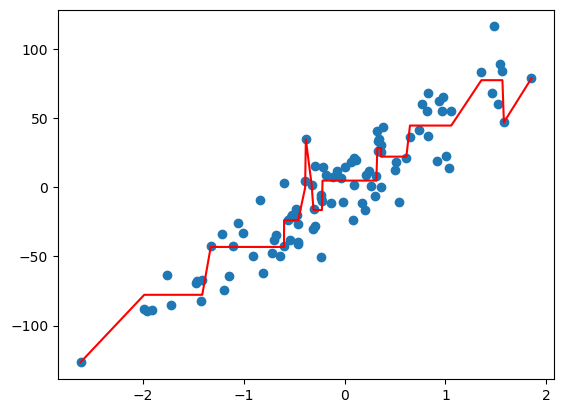

In [42]:
plt.scatter(df_train["Column_0"], df_train["Target_0"])
plt.plot(
    df_test.sort_values("Column_0")["Column_0"],
    df_test.sort_values("Column_0")["Predict_3"],
    color="red"
)
plt.show()

## GRADIENT BOOSTING RECURSIVE MODEL

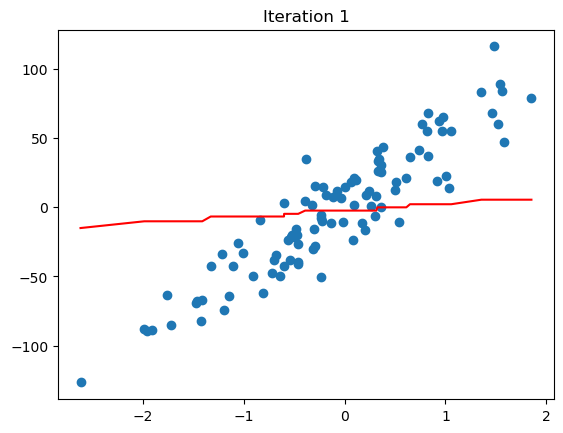

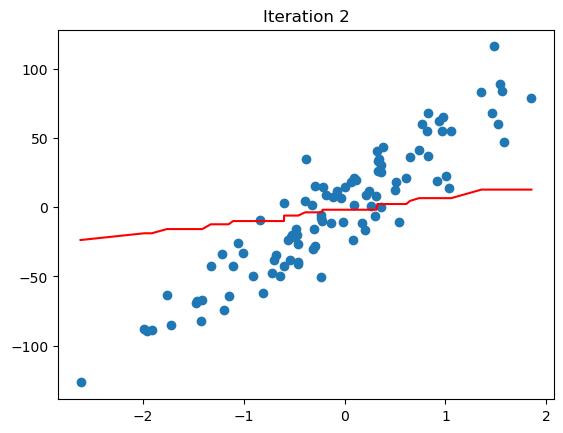

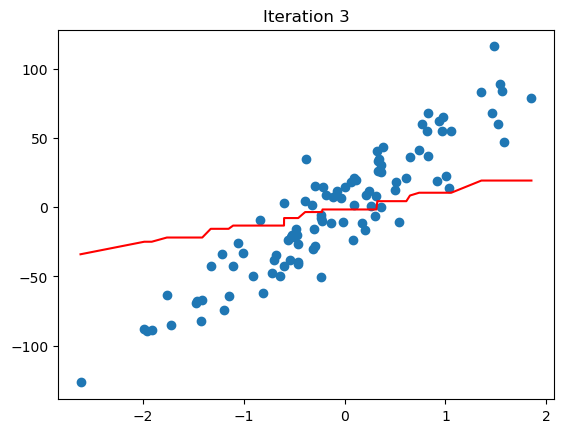

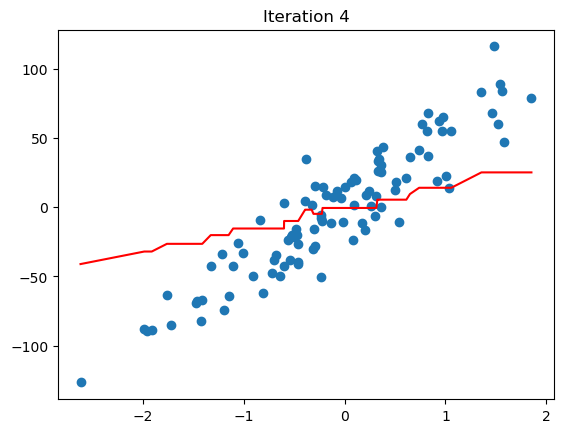

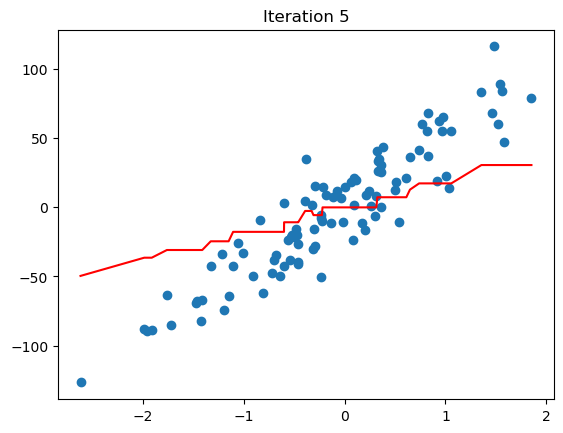

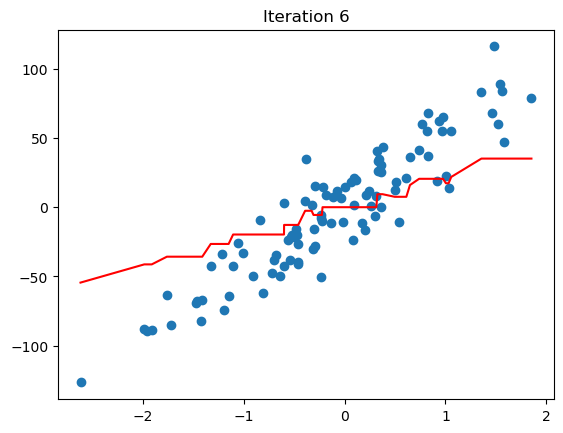

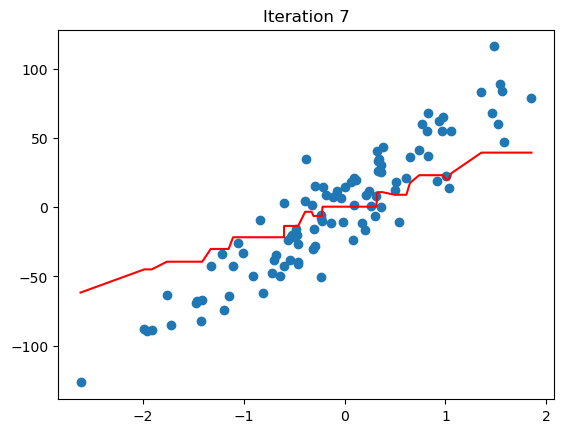

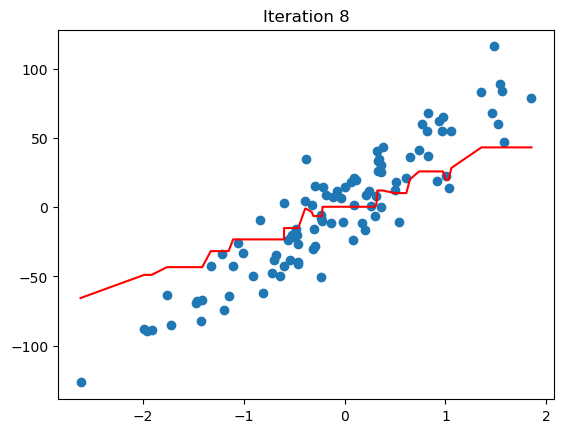

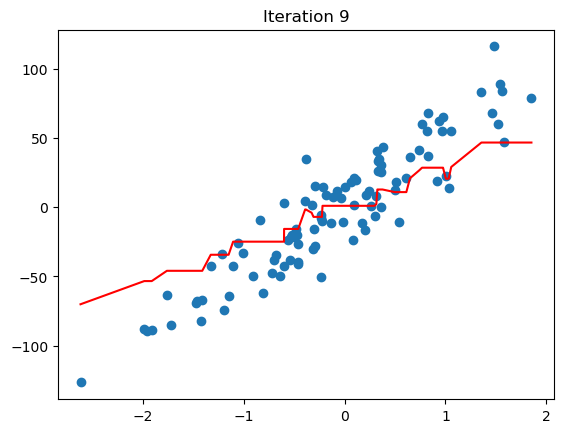

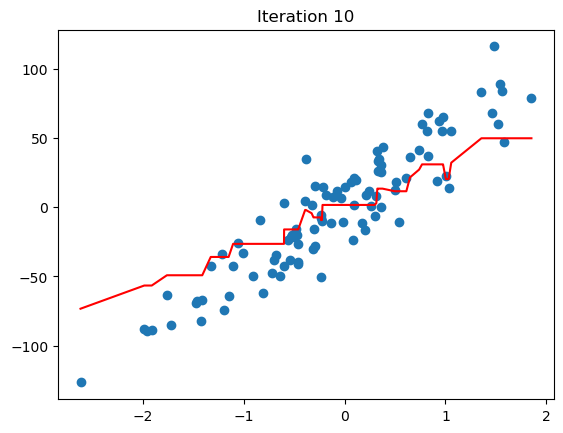

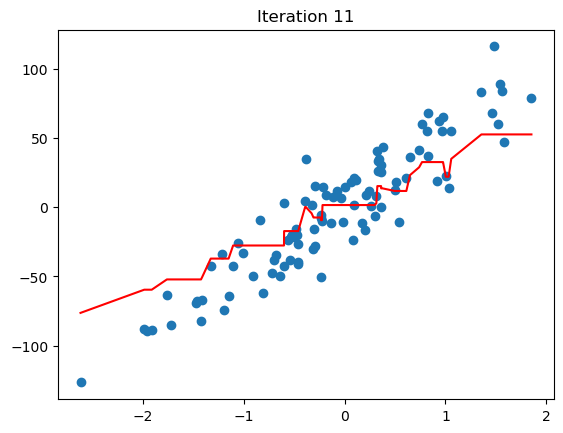

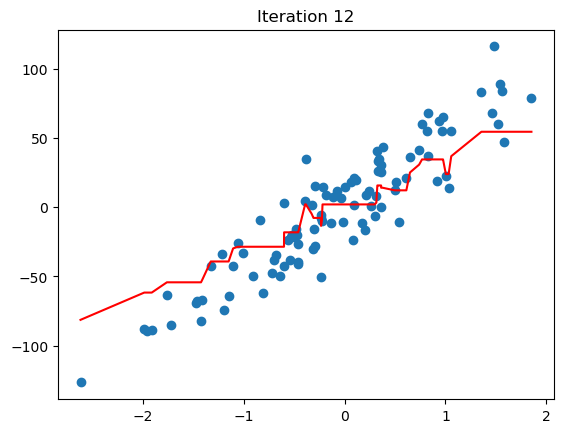

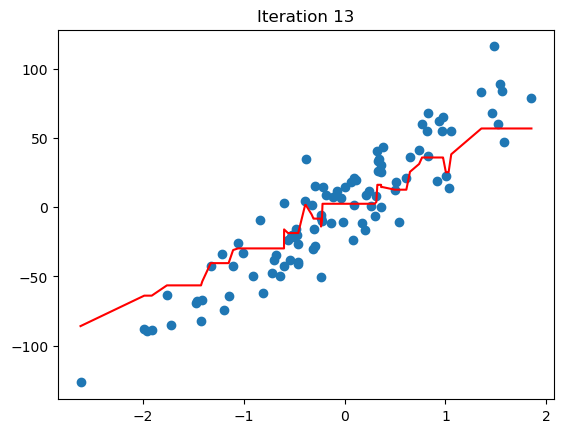

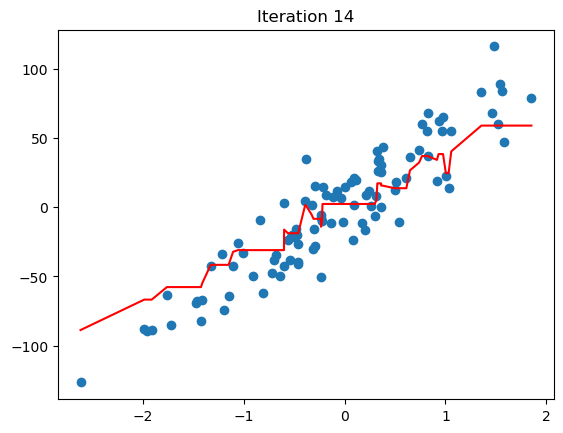

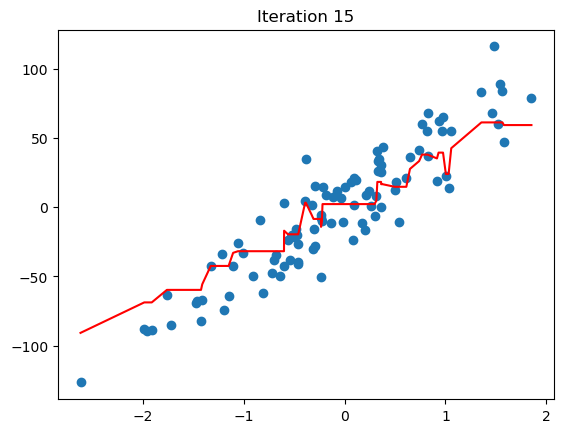

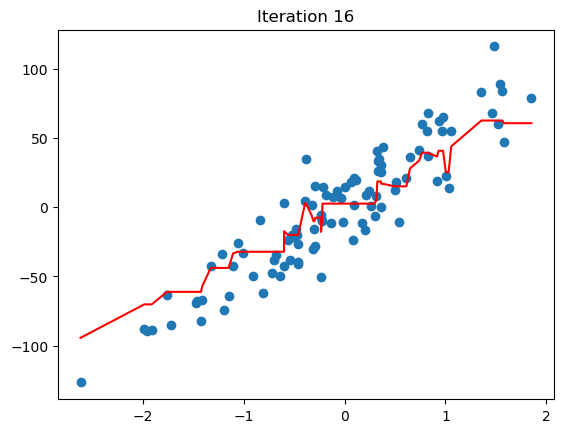

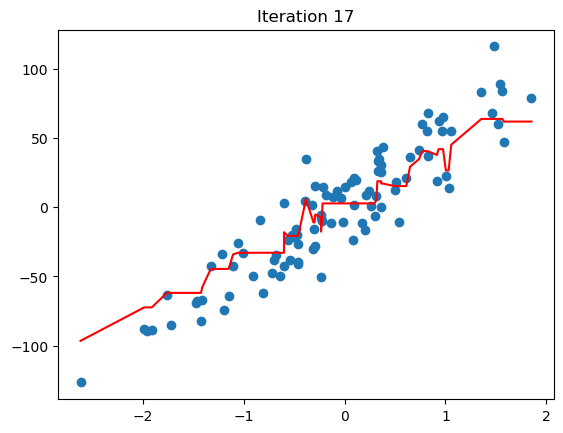

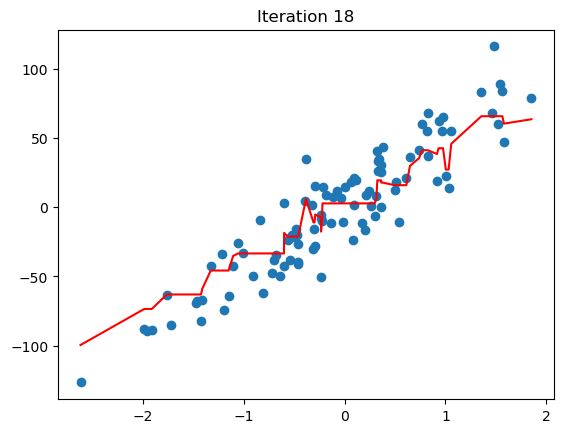

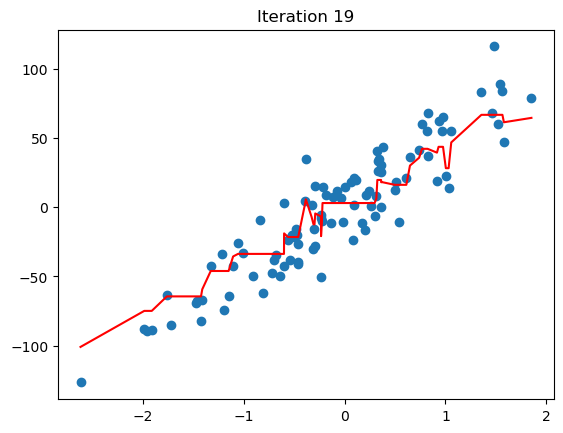

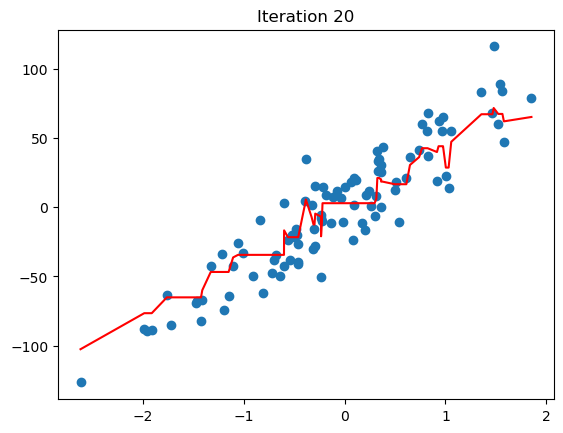

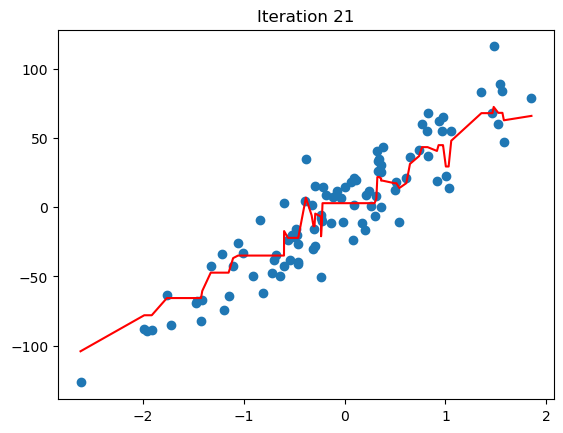

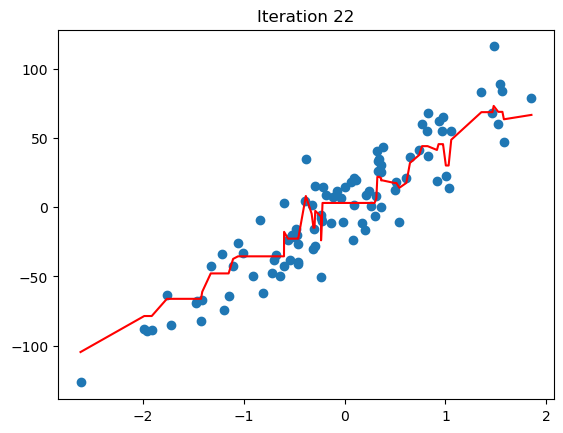

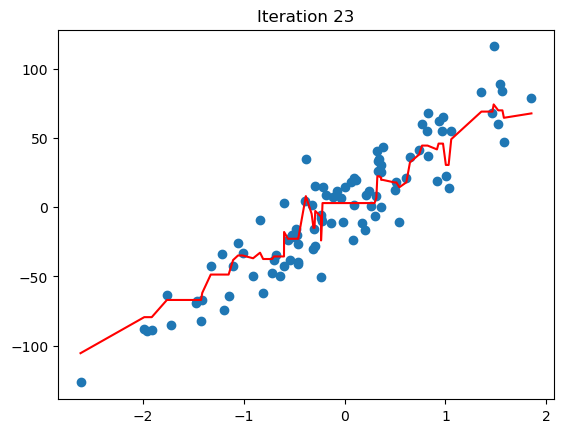

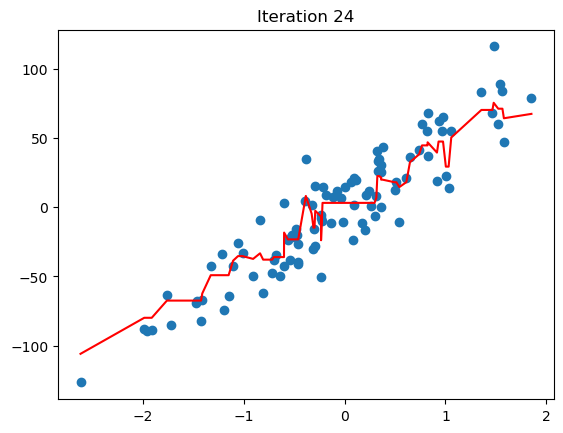

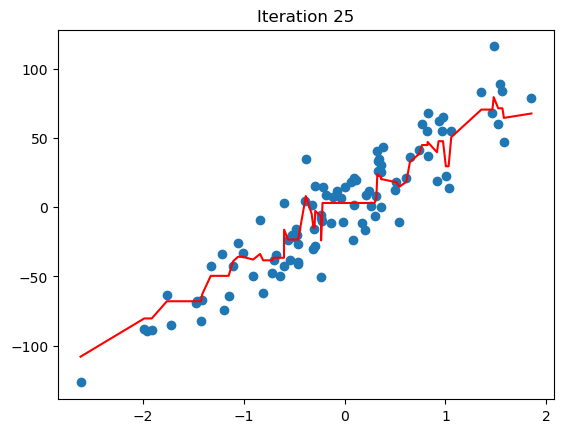

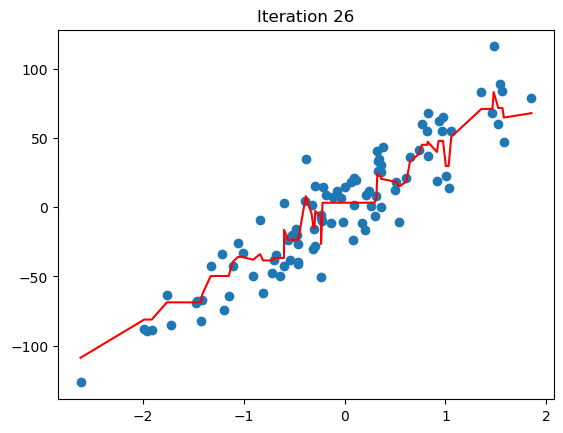

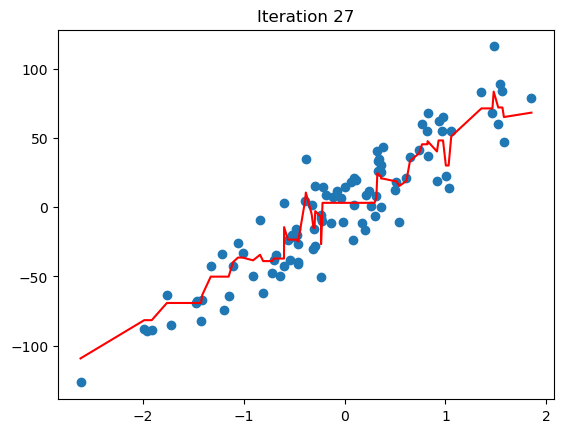

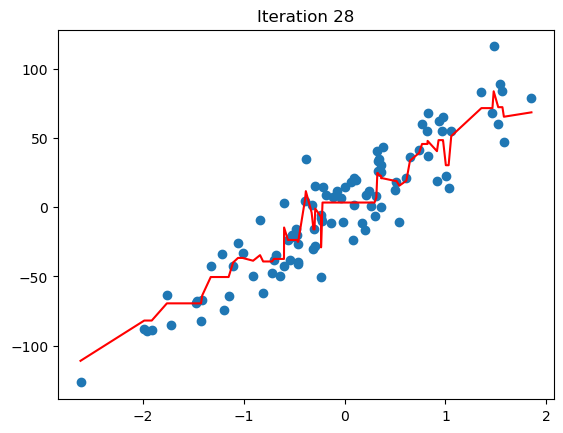

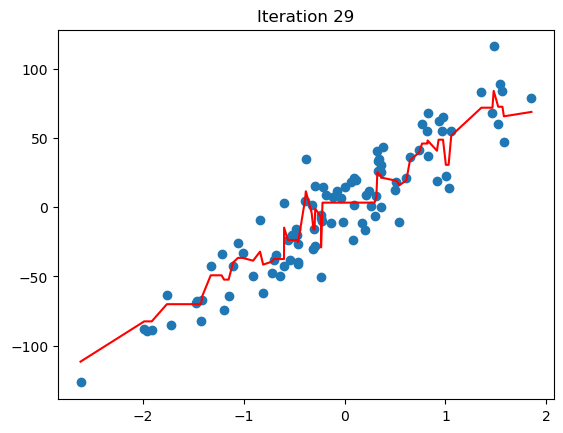

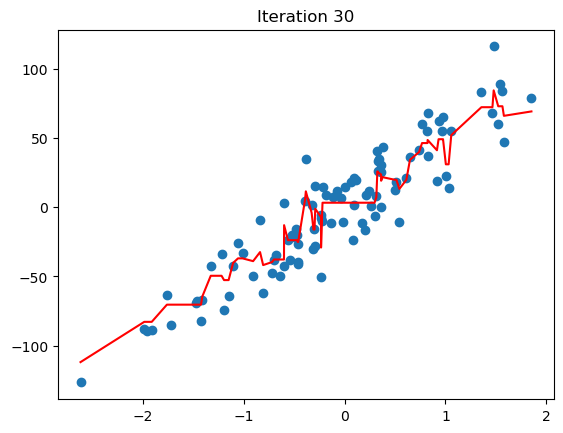

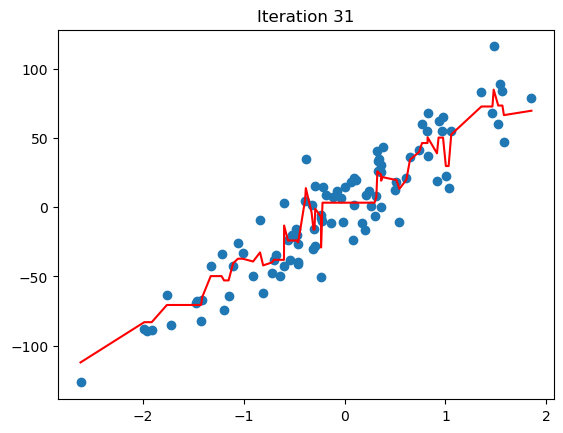

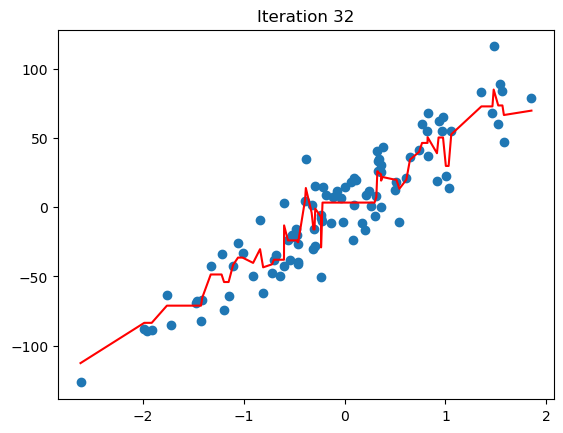

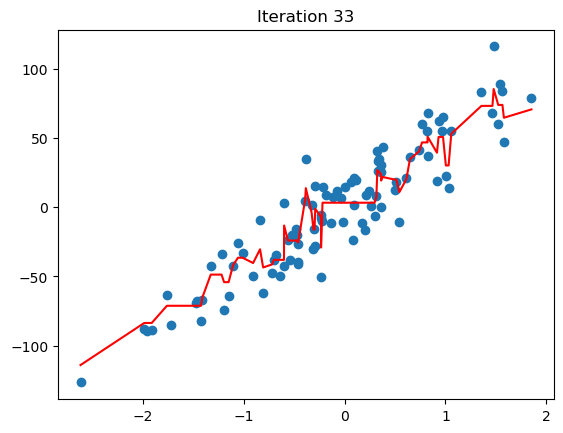

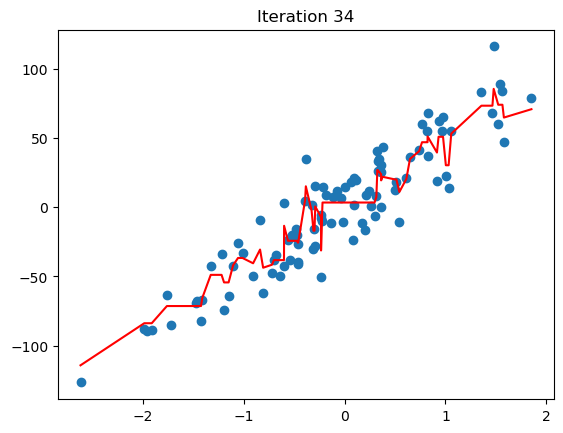

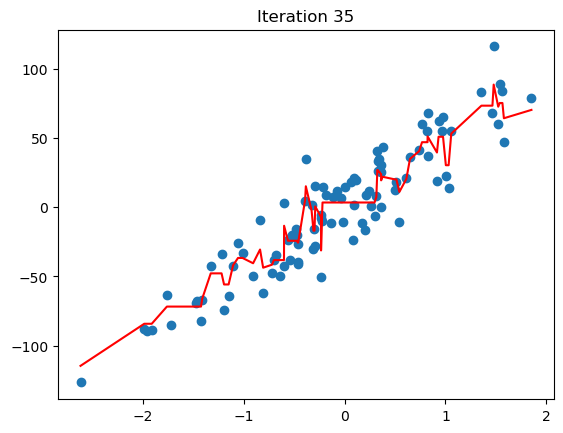

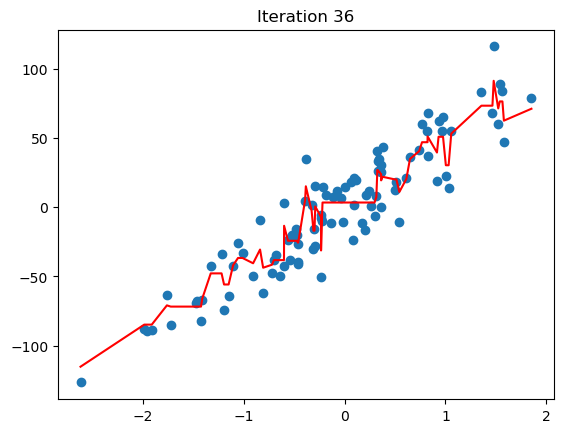

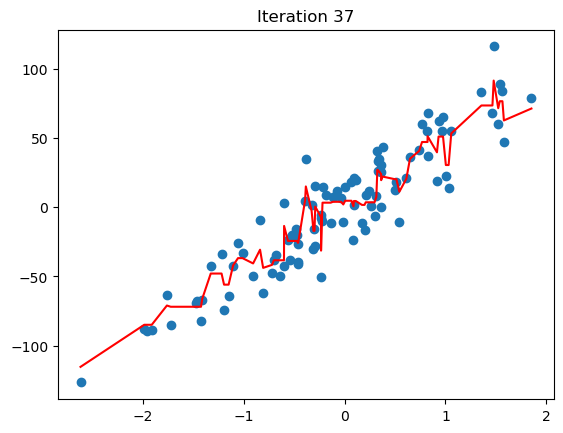

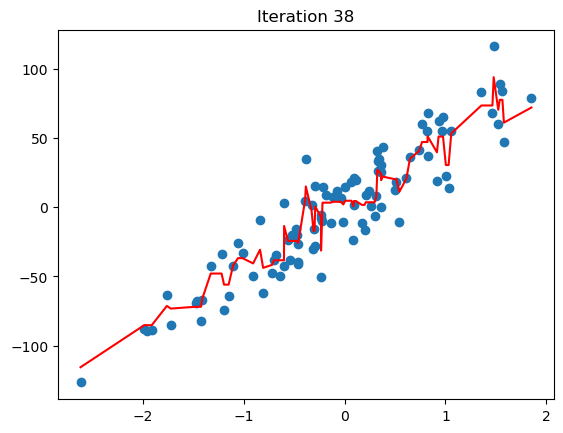

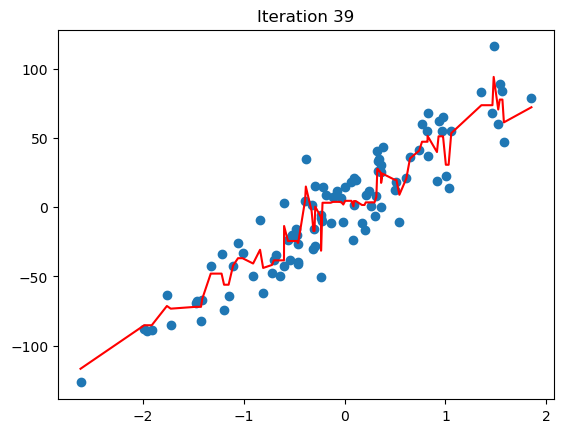

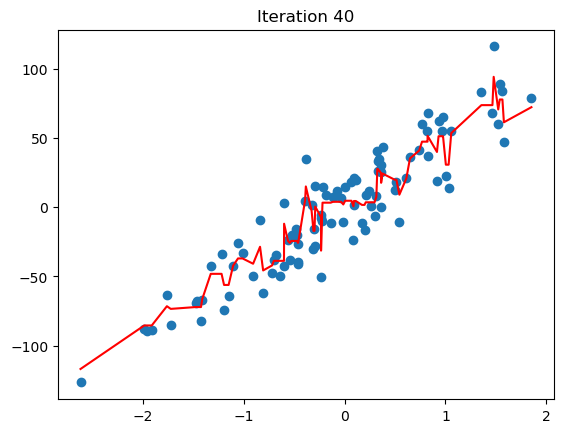

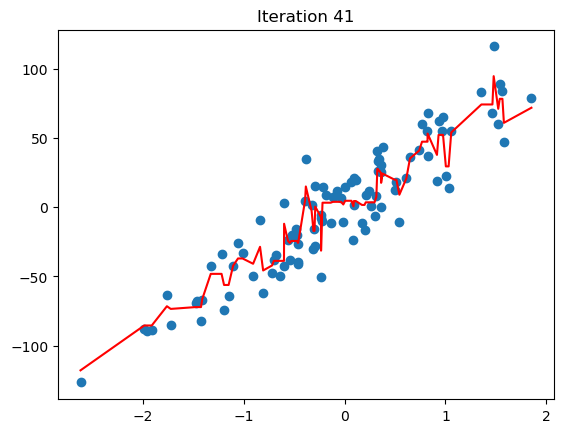

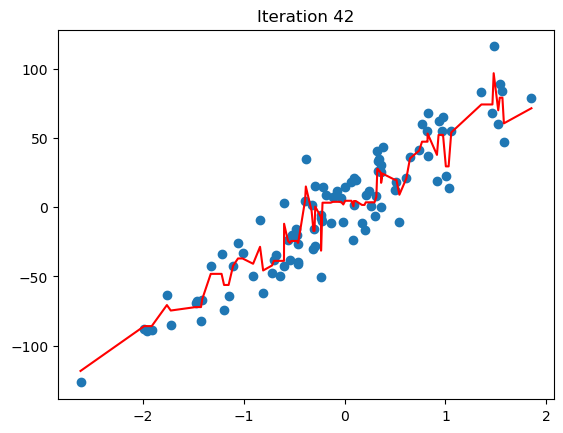

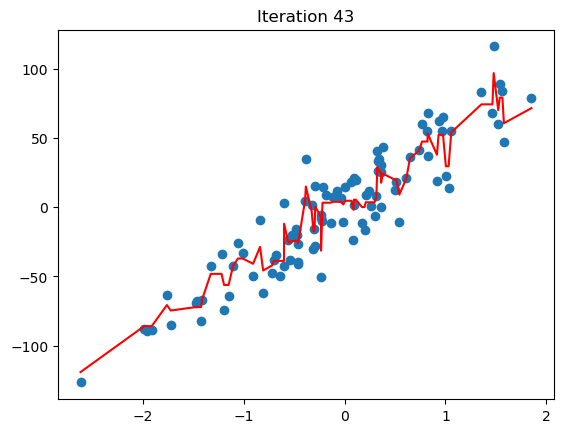

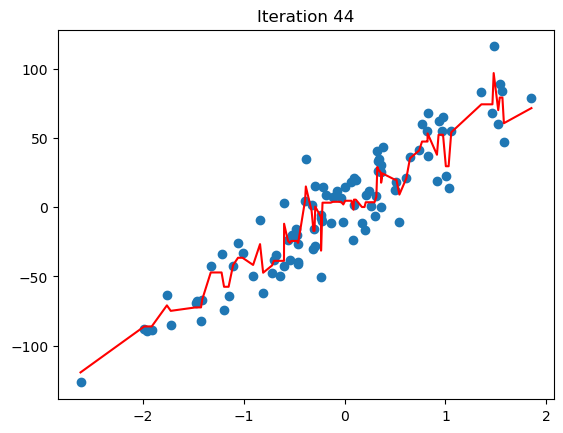

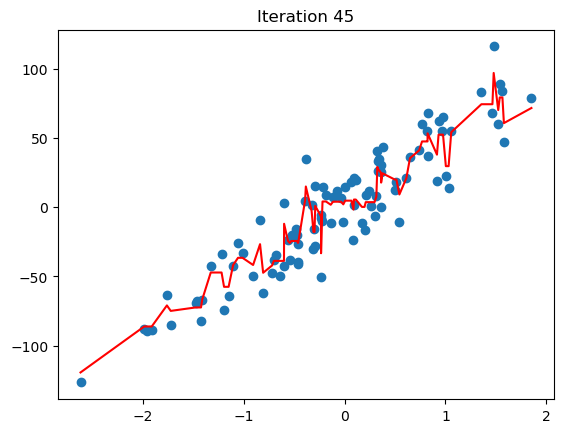

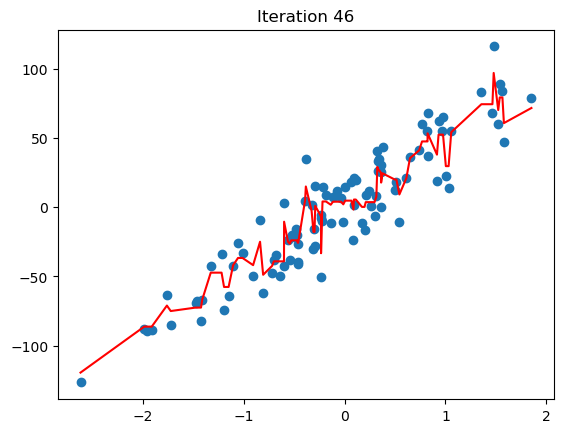

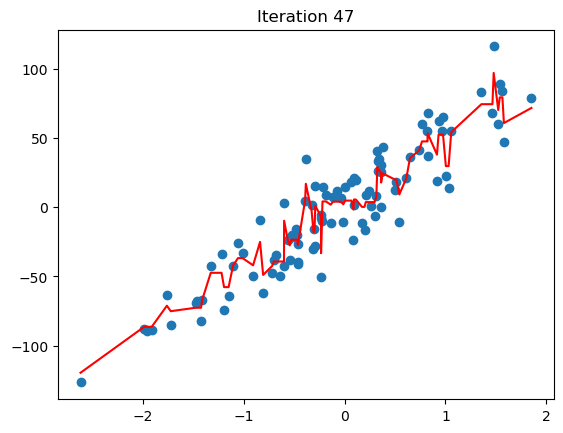

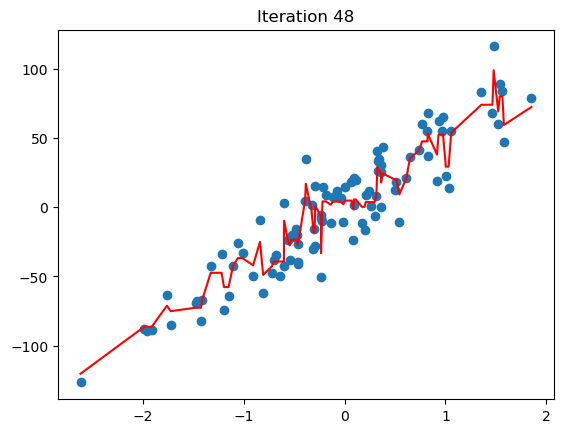

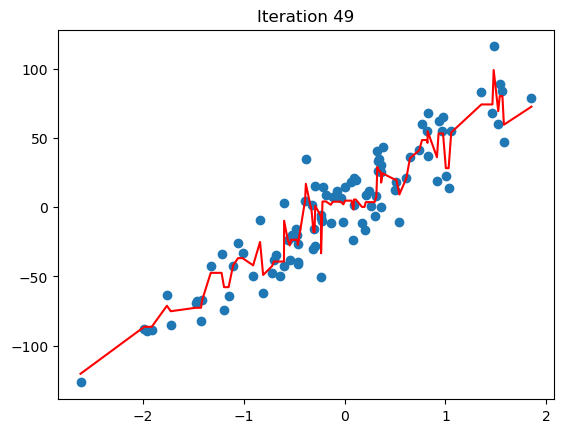

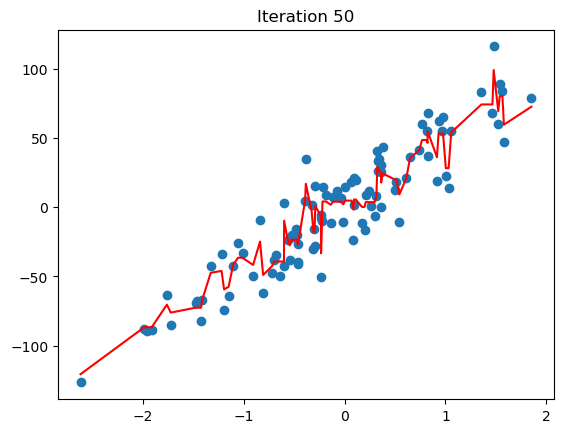

None


In [44]:
def gradient_boosting(n_samples=100, noise=20, iterations=50, lr=0.1):
    train = SyntheticData(n_samples=n_samples, noise=noise)
    test = SyntheticData(n_samples=n_samples, noise=noise)

    df_train = train.dataframe()
    df_test = test.dataframe()

    X_train = df_train[["Column_0"]].to_numpy()
    y_train = df_train["Target_0"].to_numpy()
    X_test = df_test[["Column_0"]].to_numpy()

    init_pred = y_train.mean()

    df_train["Prediction"] = init_pred
    df_test["Prediction"] = init_pred

    for i in range(iterations):
        residuals = y_train - df_train["Prediction"]
        tree = DecisionTreeRegressor(max_leaf_nodes=8)
        tree.fit(X_train, residuals)
        df_train["Prediction"] = df_train["Prediction"] + lr * tree.predict(X_train)
        df_test["Prediction"] = df_test["Prediction"] + lr * tree.predict(X_test)
        plt.scatter(df_train["Column_0"], y_train)
        plt.plot(
            df_test.sort_values("Column_0")["Column_0"],
            df_test.sort_values("Column_0")["Prediction"],
            color="red"
        )
        plt.title(f"Iteration {i + 1}")
        plt.show()

print(gradient_boosting())